In [112]:
## 1. Predicting Heart Disease Using a Classification Tree 
# ASSIGMENT FROM: https://github.com/d2cml-ai/CausalAI-Course/issues/1162

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
import os

## 1.1 Limpieza de Data

In [114]:
output_dir = 'C:/Users/user2/Documents/GitHub/Decision_Trees/python/output/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [115]:
df = pd.read_csv(r'C:\Users\user2\Documents\GitHub\Decision_Trees\python\input\processed.cleveland.data', header=None)

In [116]:
df.columns = ['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg',
              'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd']

df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [117]:
df = df.replace('?', np.nan)

# Convertir todas las columnas a tipo numérico
df = df.astype(float)

# Eliminar filas con valores faltantes
df = df.dropna()

# Verificar que ya no hay valores faltantes
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [118]:
# Variables categóricas
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Crear variables dummy (eliminar una categoría base para evitar colinealidad)
df = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

df.head()

,age,restbp,chol,thalach,oldpeak,hd,sex_1.0,cp_2.0,cp_3.0,cp_4.0,...,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0.0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,67.0,160.0,286.0,108.0,1.5,2.0,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,67.0,120.0,229.0,129.0,2.6,1.0,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,37.0,130.0,250.0,187.0,3.5,0.0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,41.0,130.0,204.0,172.0,1.4,0.0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [119]:
# Crear variable binaria
df['y'] = np.where(df['hd'] > 0, 1, 0)

# Eliminar la original
df = df.drop('hd', axis=1)

# Verificar distribución
df['y'].value_counts()

y
0    160
1    137
Name: count, dtype: int64

## 1.2 Analisis de Data

### Split de la data

In [120]:
X = df.drop(columns=['y'])
y = df['y']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=123, 
    stratify=y
)

In [122]:
# Entrenamos el modelo con los datos de entrenamiento y dejo libre parametros
clf = DecisionTreeClassifier(random_state=123)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


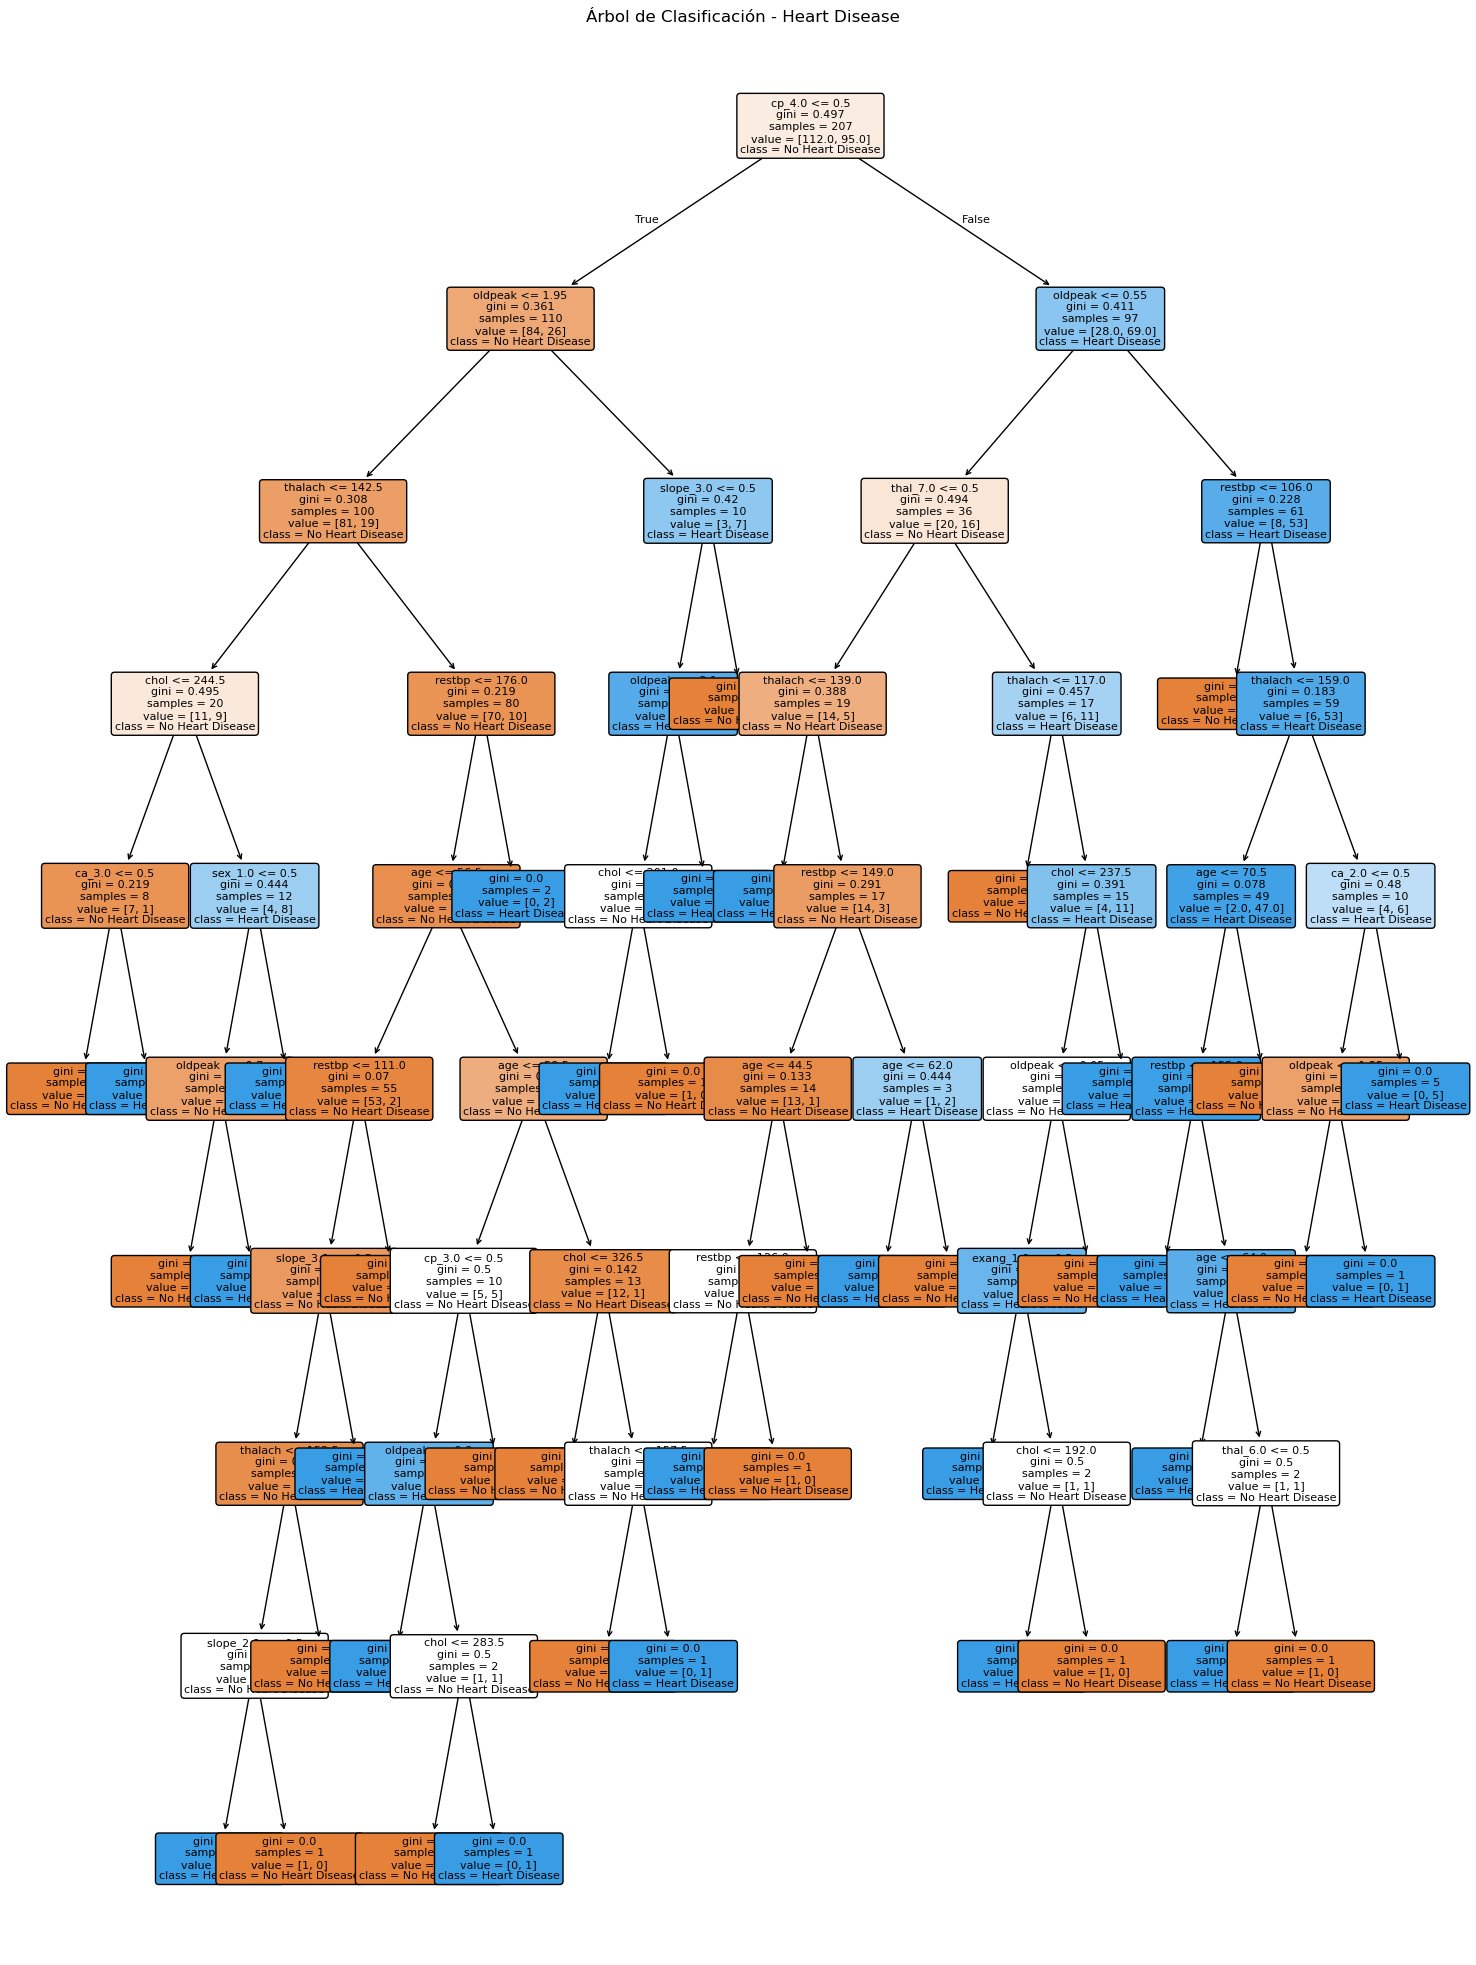

In [123]:
plt.figure(figsize=(18, 25))
# Usamos plot_tree para visualizar el árbol
plot_tree(
    clf, 
    feature_names=X.columns.tolist(),  # Nombres de las features
    class_names=['No Heart Disease', 'Heart Disease'], # Nombres de las clases
    filled=True,  
    rounded=True, 
    fontsize=8    
)

# Mostramos el gráfico
plt.title("Árbol de Clasificación - Heart Disease")
plt.savefig(output_dir + 'tree_antes_pruning.png', dpi=300, bbox_inches='tight')
plt.show()

###  graficamos la confusion matrix

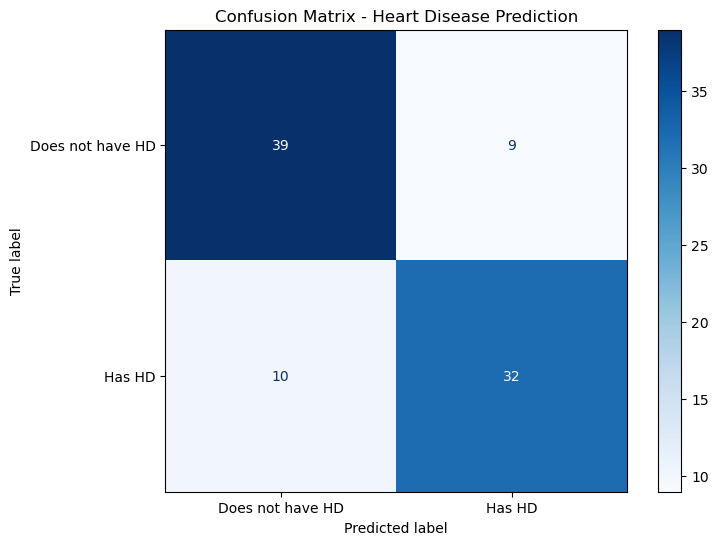


True Negatives (TN): 39
False Positives (FP): 9
False Negatives (FN): 10
True Positives (TP): 32


In [124]:
y_pred = clf.predict(X_test)

#  calculo matrix de confusion
cm = confusion_matrix(y_test, y_pred)

labels = ["Does not have HD", "Has HD"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 6)) # Create figure and axes explicitly
disp.plot(cmap=plt.cm.Blues, ax=ax) # Pass the axes to the plot function

plt.title("Confusion Matrix - Heart Disease Prediction")
plt.savefig(output_dir + 'confusion_matrix_antes_pruning.png', dpi=300, bbox_inches='tight')
plt.show() 

# Calculate TP, TN, FP, FN for interpretation
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")



La Diagonal principal (39 y 32) son las predicciones correctas. En particular, 39 personas fueron correctamente identificas como sin enfermedad (sanas). Mientras que 32 personas fueron correctamente identificadas como con enfermedad (enfermas).

Fuera de la diagonal, se observan los errores del modelo ( 10 y 9 ). En específico 10 personas fueron diagnosticas como  enfermas cuando no lo estaban. Mientras que 9 fueron señalados como sanas cuando si tenian enfermedad.

###  Hacemos cross validation

In [125]:
train_acc = accuracy_score(y_train, clf.predict(X_train))
test_acc = accuracy_score(y_test, clf.predict(X_test))

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy:  {test_acc:.3f}")

Train Accuracy: 1.000
Test Accuracy:  0.789


In [126]:
# 50 valores de alpha entre e^-10 y 0.05 (escala logarítmica)
alphas = np.geomspace(np.exp(-10), 0.05, 50)
alphas[:5]  # veo los primeros valores


array([4.53999298e-05, 5.23763313e-05, 6.04247649e-05, 6.97099649e-05,
       8.04219795e-05])

In [127]:
# Guardar accuracy medio por cada alpha
cv_scores = []
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=123)

for a in alphas:
    tree = DecisionTreeClassifier(random_state=123, ccp_alpha=a)
    scores = cross_val_score(tree, X_train, y_train, cv=cv  , scoring='accuracy')
    cv_scores.append(scores.mean())

# Convertir a array
cv_scores = np.array(cv_scores)


In [128]:
best_alpha = alphas[np.argmax(cv_scores)]
print(f"Optimal alpha: {best_alpha:.6f}")
print(f"Best cross-validation accuracy: {cv_scores.max():.4f}")


Optimal alpha: 0.032563
Best cross-validation accuracy: 0.7489


### graficar de nuevo tree y matrix de confusion con el alpha optimo

### Plot the Inaccuracy Rate 

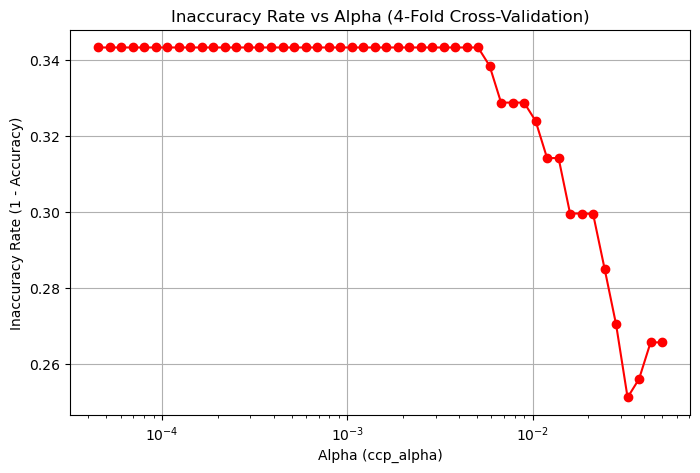

In [129]:
# Calcular tasa de error (1 - accuracy)
inaccuracy = 1 - cv_scores

# Graficar
plt.figure(figsize=(8,5))
plt.plot(alphas, inaccuracy, marker='o', color='red')
plt.xscale('log')
plt.xlabel("Alpha (ccp_alpha)")
plt.ylabel("Inaccuracy Rate (1 - Accuracy)")
plt.title("Inaccuracy Rate vs Alpha (4-Fold Cross-Validation)")
plt.grid(True)
plt.savefig(output_dir + 'inacuracy_rate_aplha.png', dpi=300, bbox_inches='tight')
plt.show()


### Grafico de tree y confusion matrix con el alpha optimo

In [130]:
# Entrenar árbol final con alpha óptimo
pruned_tree = DecisionTreeClassifier(random_state=123, ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [131]:
# Evaluar en train y test
from sklearn.metrics import accuracy_score

train_acc_pruned = accuracy_score(y_train, pruned_tree.predict(X_train))
test_acc_pruned = accuracy_score(y_test, pruned_tree.predict(X_test))

print(f"Train Accuracy (pruned): {train_acc_pruned:.3f}")
print(f"Test Accuracy (pruned):  {test_acc_pruned:.3f}")

Train Accuracy (pruned): 0.758
Test Accuracy (pruned):  0.767


In [ ]:
plt.figure(figsize=(18,9))
plot_tree(pruned_tree,
          filled=True,
          feature_names=X.columns,
          class_names=["Does not have HD", "Has HD"],
          rounded=True,
          fontsize=8)
plt.title(f"Pruned Classification Tree (Optimal α = {best_alpha:.6f})")
plt.savefig(output_dir + 'tree_despues_prunning.png', dpi=300, bbox_inches='tight')
plt.show()


El arbol se ha podado bastante, lo cual lo hace más explicativo y el poder de predicción en la matrix de confusión no varió mucho

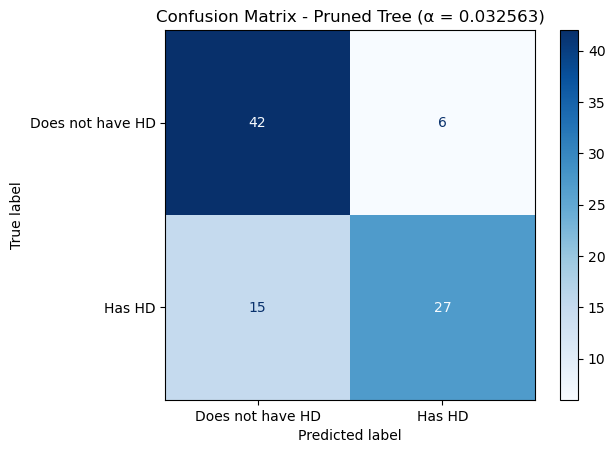

In [ ]:
# Predicciones con el modelo podado
y_pred_pruned = pruned_tree.predict(X_test)

# Matriz de confusión
cm_pruned = confusion_matrix(y_test, y_pred_pruned)

# Mostrar
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pruned,
                              display_labels=["Does not have HD", "Has HD"])
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix - Pruned Tree (α = {best_alpha:.6f})")
plt.savefig(output_dir + 'confusion_matrix_despues_pruning.png', dpi=300, bbox_inches='tight')

plt.show()


La diagonal principal, indica las predciones correctas. 42 fueron diagnosticados como sanos cuando estaban sanos, 27 fueron diagnosticados como enfermos cuando estaban enfermos. En al diagonal secundarira (15 y 6) se muestran las equivaciones del modelo. 